## Visualizing the Dataset

First, we create the handler-class `PACS` (`Camelyon17`). Afterwards, we get the training and validation dataloaders. These loaders contain the concatenated datasets except for the `test_domain`. We set a `batch_size` of 6 for better visualization.
The label mappings are stored directly in the handler class. This assumes that there is no label shift across domains.

Lastly, we define a custom `show()` function that helps us visualize the batches with their corresponding labels and call the function on three batches from the train set.

In [4]:
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from domgen.data import PACS, Camelyon17

data = PACS('../datasets/', test_domain=3)
# data = Camelyon17('../datasets/', test_domain=0)

train, val, test = data.generate_loaders(batch_size=6)

idx_to_class = data.idx_to_class
print(idx_to_class)

def show(img, label):
    fig = plt.figure()
    plt.axis('off')
    plt.imshow(img.permute(1,2,0))
    plt.title(label)

Domain 0: 2048 samples
Domain 1: 2344 samples
Domain 2: 1670 samples
Domain 3: 3929 samples
{0: 'dog', 1: 'elephant', 2: 'giraffe', 3: 'guitar', 4: 'horse', 5: 'house', 6: 'person'}


### Visualize Grids with Labels

Visualizing batches from the training and test set.

First, we visualize from the train set. There should be no members of the test domain.


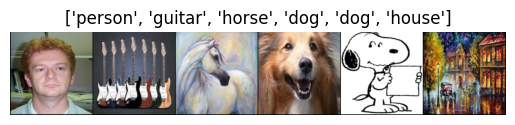

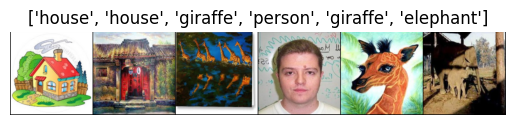

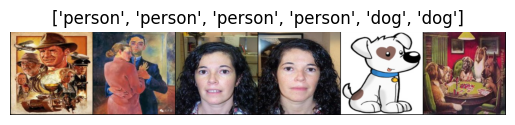

In [5]:
for i in range(3):
    images, labels = next(iter(train))
    grid = make_grid(images, scale_each=True)
    labels = [idx_to_class[label.item()] for label in labels]
    show(grid, labels)

Next, we visualize from the test set. There should only be members from the test domain:

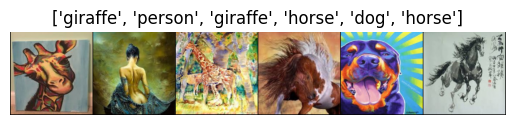

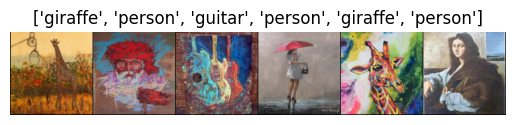

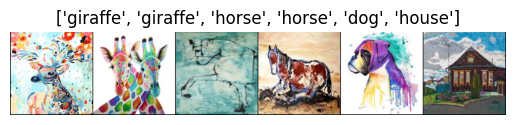

In [3]:
for i in range(3):
    images, labels = next(iter(test))
    grid = make_grid(images, scale_each=True)
    labels = [idx_to_class[label.item()] for label in labels]
    show(grid, labels)

In [4]:
len(train), len(val), len(test), len(idx_to_class)

(10574, 2644, 1982, 2)